In [10]:
import pandas as pd 

df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label','message']

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [11]:
df['label_num'] = df.label.map({'ham' : 0, 'spam' : 1})

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:" , accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9632286995515695
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

models = {
    "LogisticRegression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM" : LinearSVC()
}

for name,model in models.items():
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test,preds)
    print(f"{name} Accuracy: {acc:4f}")

LogisticRegression Accuracy: 0.963229
Naive Bayes Accuracy: 0.962332
SVM Accuracy: 0.980269


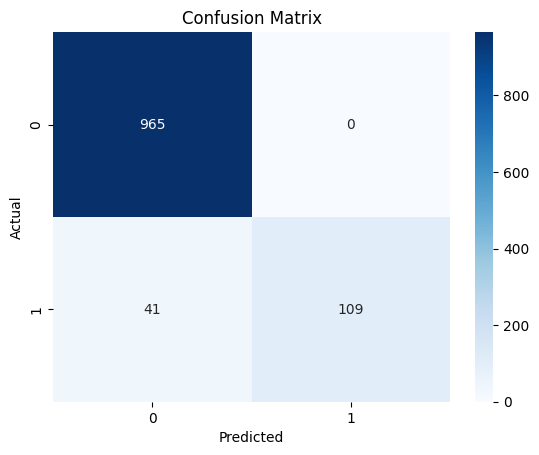

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

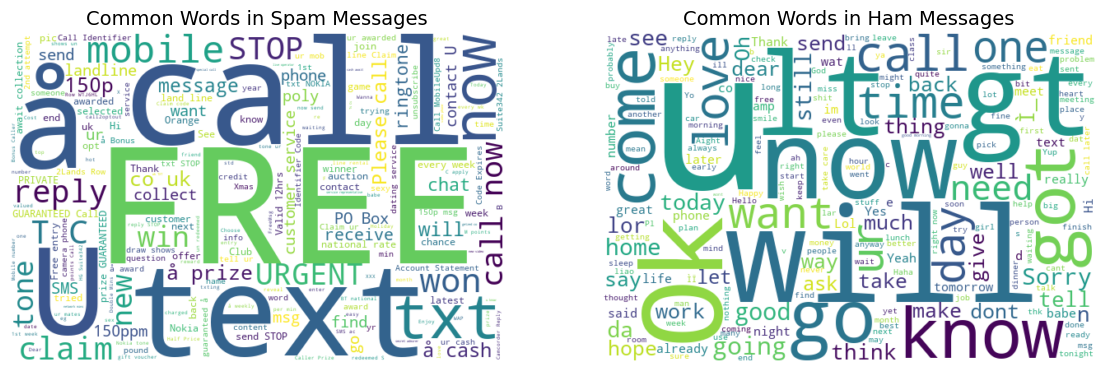

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate text for spam and ham messages
spam_words = ' '.join(df[df['label_num'] == 1]['message'])
ham_words = ' '.join(df[df['label_num'] == 0]['message'])

# Create word clouds
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

# Plot both
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Spam Messages", fontsize=14)

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Ham Messages", fontsize=14)

plt.show()


In [22]:
import pickle
from sklearn.svm import LinearSVC

# Train final model (if not already trained)
final_model = LinearSVC()
final_model.fit(X_train, y_train)

# Save model
with open('spam_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)


In [23]:
import pickle
from sklearn.svm import LinearSVC

# Train final model (if not already trained)
final_model = LinearSVC()
final_model.fit(X_train, y_train)

# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)